In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xg 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import hamming_loss, log_loss
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance

###### Loading the dataset

In [2]:
# Loading the training dataset.

df_train = pd.read_csv('train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [68]:
# Loading the test dataset.

df_test = pd.read_csv("test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
# Shape of the train dataset.

df_train.shape

(159571, 8)

    The training dataset contains 1,59,571 samples and 8 features indicating the comment text, id of each comment text, and 6 different categories of comments.

In [69]:
# Shape of the test dataset.

df_test.shape

(153164, 2)

    The test dataset contains 1,53,164 samples and 2 features indicating the comment text and id of each comment text.

In [6]:
# Checking the datatype of the training dataset.

df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

    'Id' and 'comment_text' are object type and rest are of int64 type.

In [70]:
# Checking the datatype of the test dataset.

df_test.dtypes

id              object
comment_text    object
dtype: object

    Both the attributes of test data are of object type.

In [8]:
# Creating a list of all the labels to predict.

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [9]:
# Total number of various categories nof comments

print(df_train[comments_labels].sum())

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


###### Dropping the column

In [10]:
# Dropping the 'Id' column -
# As every comment has it's own unique id which will not contribute much in the model from train dataset.

df_train.drop('id', axis=1, inplace=True)

In [11]:
# Checking the training dataset after dropping one column.

df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


    Now, there are only 7 fields in the training dataset.

###### Checking the missing values

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64 



<AxesSubplot:>

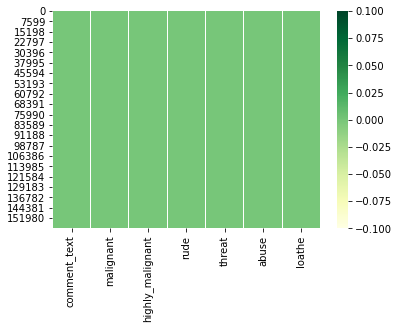

In [14]:
# Checking the missing values in the dataset in the training dataset
print(df_train.isnull().sum(), '\n')

# Visualizing the same using heatmap.
sns.heatmap(df_train.isnull(), cmap='YlGn')

    From the above code and plot, it is clear that there are no null/missing values present in the dataset.

In [73]:
# Checking the missing comments in the test dataset.

df_test.isnull().sum()

comment_text    0
dtype: int64

###### Statistical Summary

In [16]:
# Statistical Summary of the train dataset.

df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    - The minimum value and the maximum value of the attributes is same i.e. 0 and 1 respectievly.
    - The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
    - Here, with this statistical analysis, it is interpreted that there are no outliers as weel as skewness present in 
      this training dataset.
    - The count of each field is equal which shows that there are no missing values present.

###### Correlation

<AxesSubplot:>

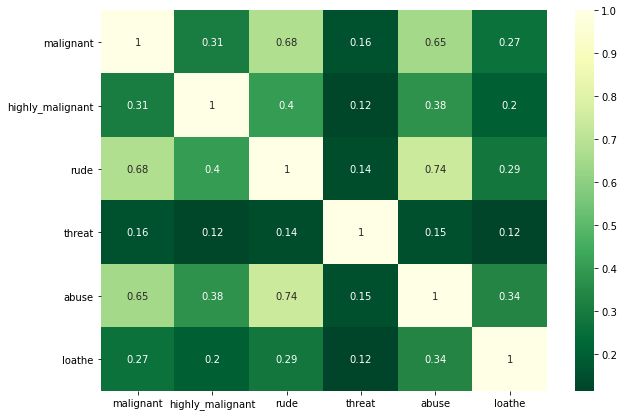

In [17]:
# Correlation of the train dataset is visualized using heatmap.

plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGn_r')

    - The highest positive correlation is seen in between fields 'rude' and 'abuse'.
    - Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.
    - Overall the correlation among the attributes is not positive.

###### Creating new feature

In [18]:
# Creating a 'nuetral' column in the train dataset.
# Depicting the comments having no toxicity i.e. the comments are not in any category preset in the dataste.

df_train['neutral'] = 1 - df_train[comments_labels].max(axis = 1)

In [19]:
# Checking the value counts of column - nuetral

df_train['neutral'].value_counts()

1    143346
0     16225
Name: nuetral, dtype: int64

In [20]:
# Checking the dataset after creating a new feature.

df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,nuetral
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [21]:
# Creating a column 'length_before_cleaning' in training dataset.
# Representing the length of the each comment respectively in a column 'comment_text' 

df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,nuetral,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,1,116


In [74]:
# Creating a column 'length_before_cleaning' in test dataset.
# Representing the length of the each comment respectively in a column 'comment_text' 

df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== Throw from out field to home plate. == \n\n...,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,""" \n\n == """"One of the founding nations of the...",502


###### Visualizing and understanding the data

In [23]:
cat_features = df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'nuetral']]

In [24]:
# Checking the value counts of the variables.

for count in cat_features.columns:
    x = df_train[count].value_counts()
    print("--------",count,"--------\n",x, '\n')

-------- malignant --------
 0    144277
1     15294
Name: malignant, dtype: int64 

-------- highly_malignant --------
 0    157976
1      1595
Name: highly_malignant, dtype: int64 

-------- rude --------
 0    151122
1      8449
Name: rude, dtype: int64 

-------- threat --------
 0    159093
1       478
Name: threat, dtype: int64 

-------- abuse --------
 0    151694
1      7877
Name: abuse, dtype: int64 

-------- loathe --------
 0    158166
1      1405
Name: loathe, dtype: int64 

-------- nuetral --------
 1    143346
0     16225
Name: nuetral, dtype: int64 



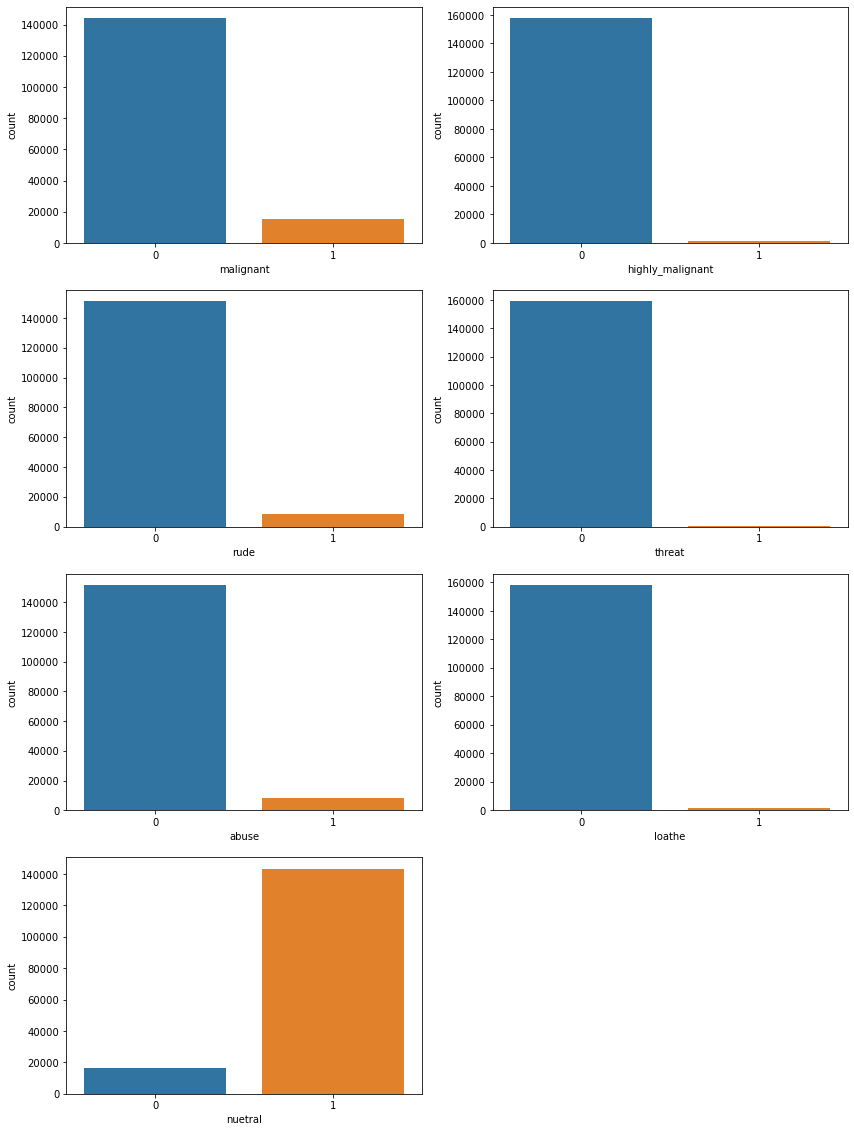

In [25]:
# Visualizing the count of categorical data using countplot.

count=1
plt.subplots(figsize=(14, 20))
for i in cat_features.columns:
    plt.subplot(4,2,count)
    sns.countplot(df_train[i], data = df_train)
    count+=1

plt.show()

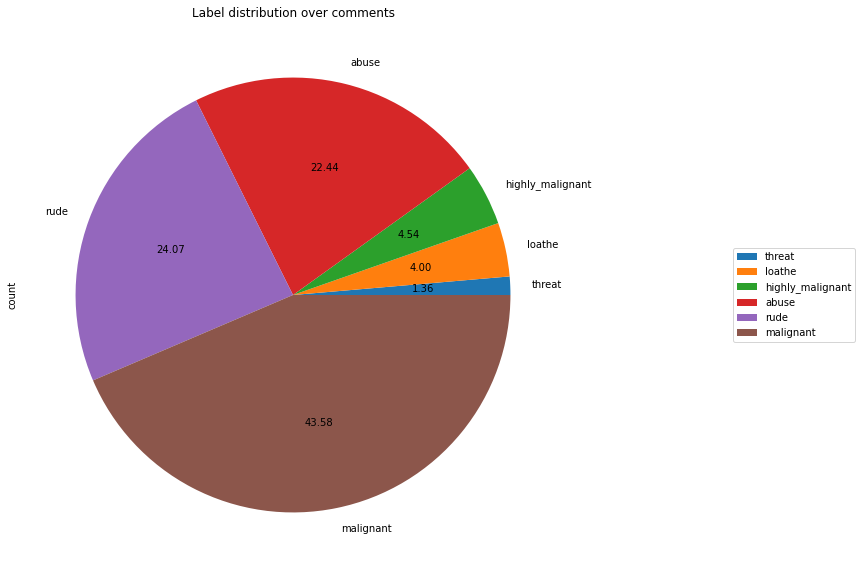

In [26]:
# Visualizing te label distribution of comments using pie chart.

df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<AxesSubplot:title={'center':'Labels Frequency'}>

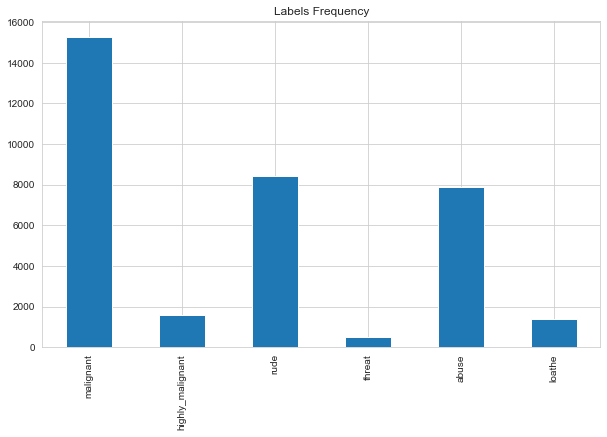

In [27]:
# Plotting the bar plot that show the total comment counts for different labels.

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
df_train[comments_labels].sum(axis=0).plot.bar(title='Labels Frequency')

    From the above plot, it is observed :
    - "malignant" comment has the highest frequency of occurrence followed by "rude" and "abuse", respectively.
    - On the other hand, a few comments belongs to the 'threat' category. 
    - With the count of nearly 8000 the comments are categorised as 'rude' and 'abuse'.

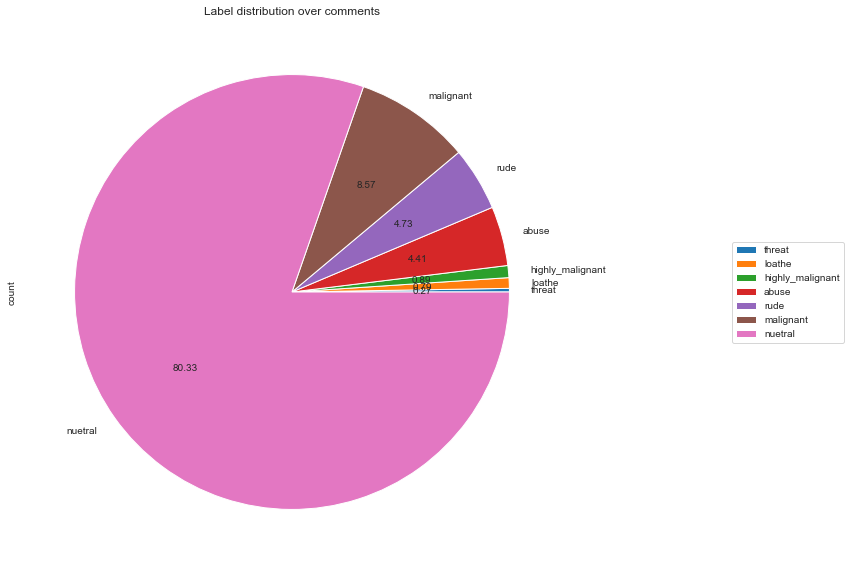

In [28]:
# Visualizing te label distribution of comments using pie chart when a new feature is created - 'nuetral'.

df_distribution = cat_features.sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

Text(0.5, 0, 'Categories')

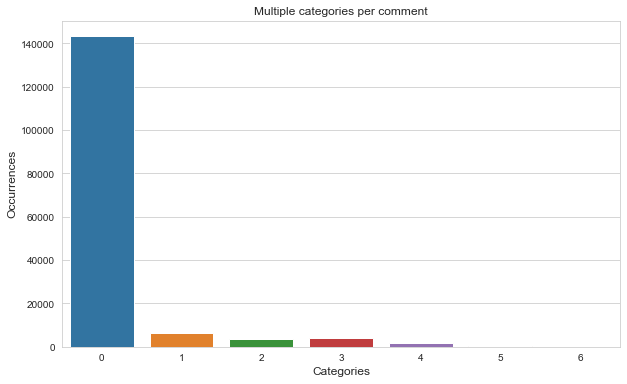

In [29]:
# Checking how many comments have multi-label via barplot.

x = df_train[comments_labels].sum(axis=1).value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Categories', fontsize=12)

    Vast majority of the comment text are not labeled which is around 89%. This essentially shows that a large amount of 
    the entire dataset is tagged to none of the six labels.

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

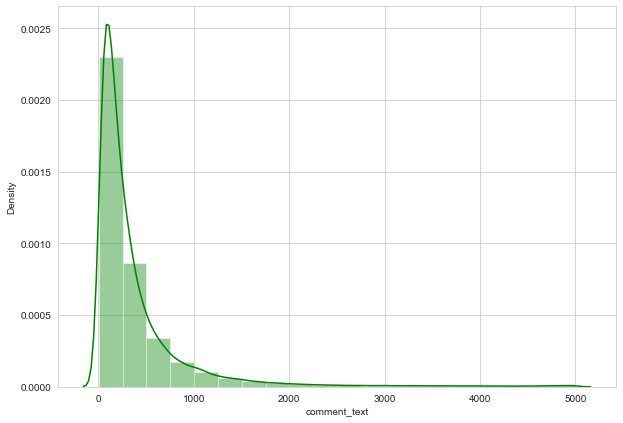

In [30]:
# Distribution of comments length.

plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

    Above, is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few 
    comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum 
    length is 5. Median length being 250.

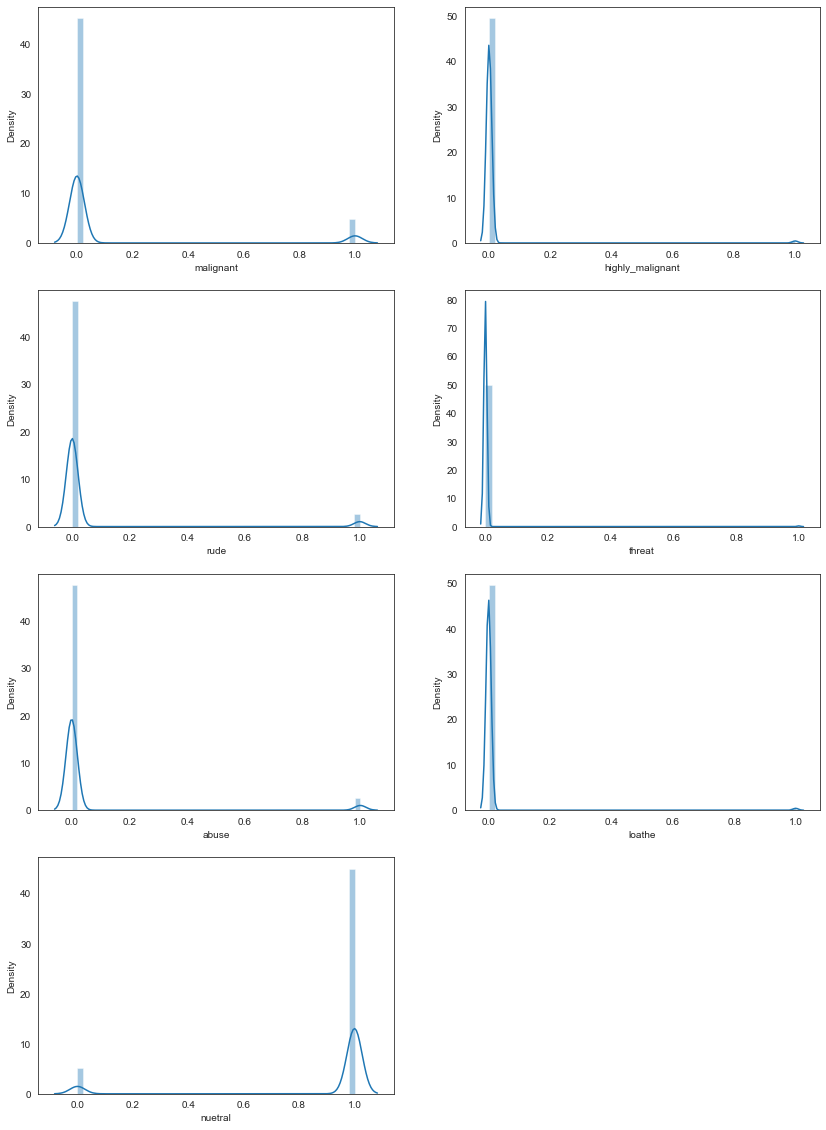

In [31]:
# Distribution of comments length label-wise or category-wise.

count = 1
sns.set_style('white')
plt.subplots(figsize=(14, 20))
for i in cat_features.columns:
    plt.subplot(4,2,count)
    sns.distplot(df_train[i])
    count+=1

plt.show()

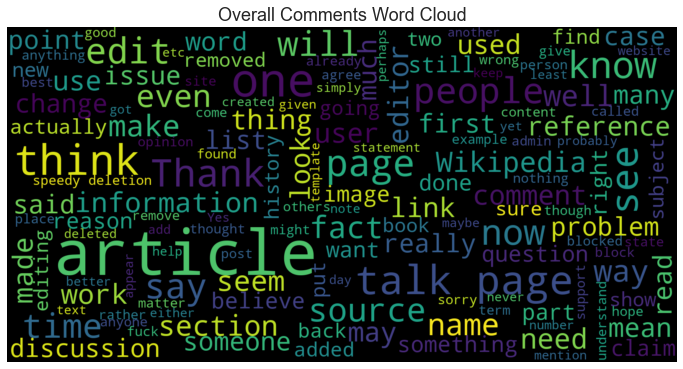

In [32]:
# Word Cloud for 'comment_text'

words = ' '.join([text for text in df_train['comment_text'] ])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="black").generate(words)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Overall Comments Word Cloud', fontsize = 18)
plt.axis("off")
plt.show()

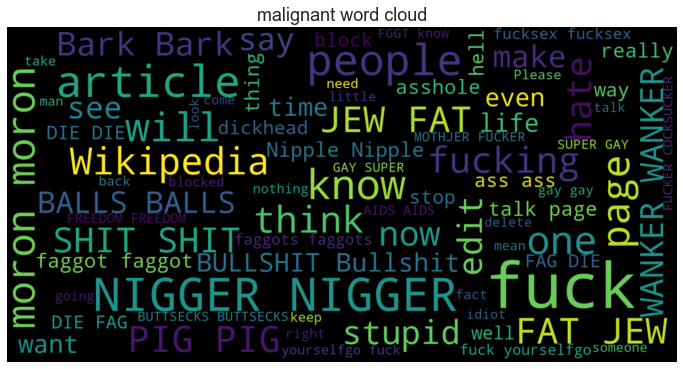

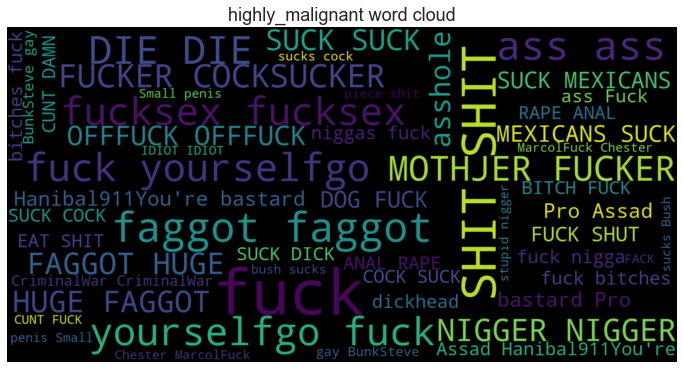

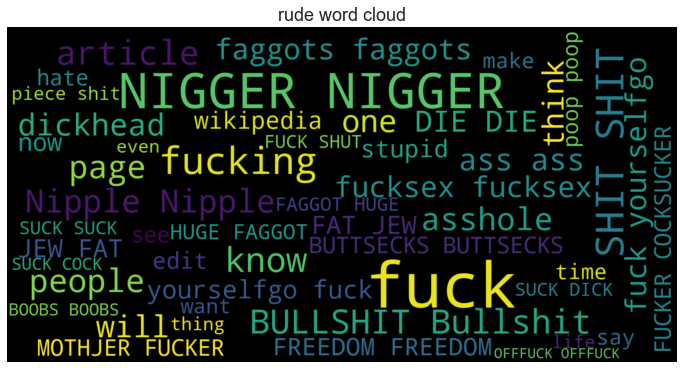

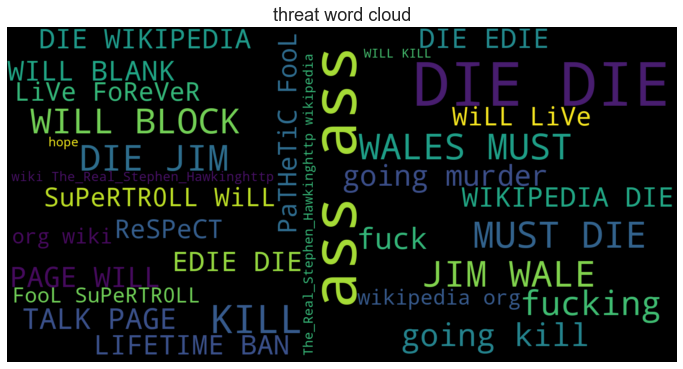

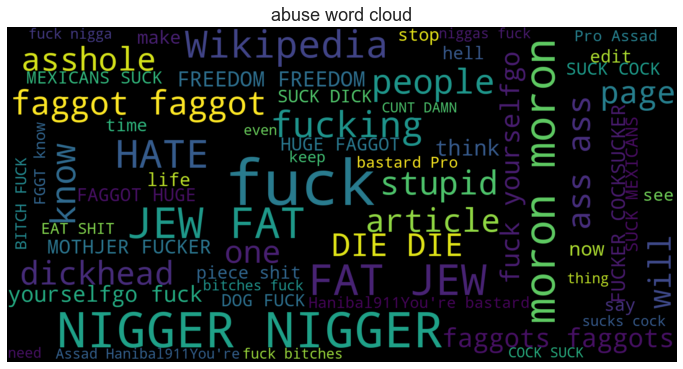

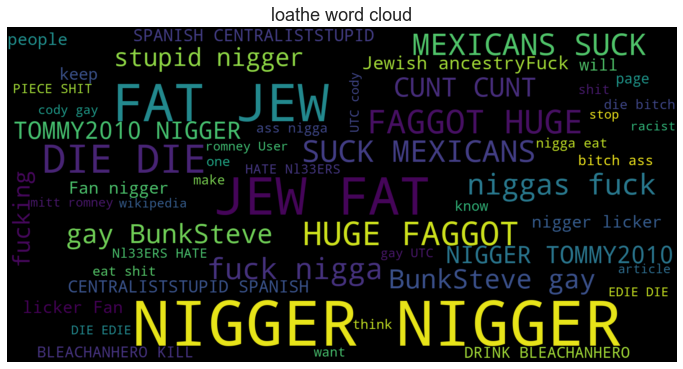

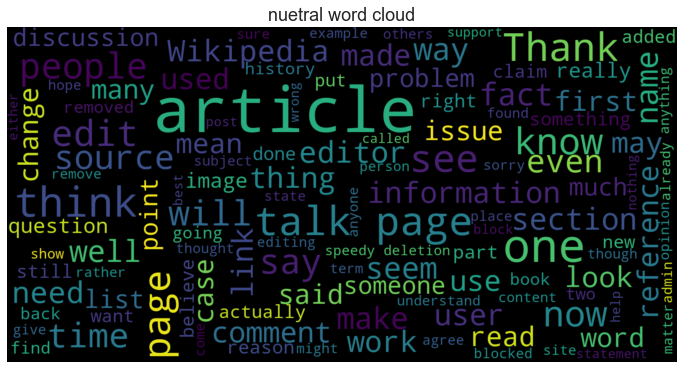

In [33]:
# Word cloud for the labels

for i in cat_features.columns:
    plt.figure(figsize=(12,8))
    label_words = " ".join(df_train[df_train[i] == 1]["comment_text"])
    
    word_cloud = WordCloud(width = 1600,
                           height = 800,
                           max_words = 500, 
                           min_word_length = 3,
                           max_font_size = 150, min_font_size = 30, 
                           background_color="black").generate(label_words)
    
    plt.title("{} word cloud".format(i), fontsize = 18)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

###### Pre-Processing

In [34]:
# Defining the stop words
stop_words = stopwords.words('english')

# Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
# Replacing '\n'

df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [36]:
# Function Definition
def clean_comments(text):
    
    # convert to lower case
    lowered_text = text.lower()
    
    # Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    # Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    # Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    # Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    # Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    # Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    # Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # Splitting data into words
    tokenized_text = word_tokenize(text)
    
    # Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [37]:
# Calling the above function for the column - comment_text in training dataset.

df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [38]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.

df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,nuetral,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,1,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,1,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,1,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,1,622,364
4,sir hero chance remember page,0,0,0,0,0,0,1,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,1,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,1,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,1,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,1,116,56


In [39]:
# Total length removal in train dataset.

print("Origional Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Origional Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [75]:
# Calling the above function for the column - comment_text in test dataset.

df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [76]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.

df_test['len_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,comment_text,length_before_cleaning,len_after_cleaning
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24
...,...,...,...
153159,totally agree stuff nothing long crap,60,37
153160,throw field home plate get faster throwing cut...,198,107
153161,okinotorishima category see change agree corre...,423,238
153162,one founding nation eu germany law return quit...,502,319


In [77]:
# Total length removal in test dataset.

print('Original Length',df_test.length_before_cleaning.sum())
print('Clean Length',df_test.len_after_cleaning.sum())

Original Length 55885733
Clean Length 34282033


###### Separating the input and output variables

In [78]:
# Let's Separate the input and target variables represented by X and y respectively in train data.
X = df_train.comment_text
y = df_train[comments_labels]

# Let's Separate the input variable represented by test_X in test data.
test_X = df_test.comment_text

In [50]:
X.head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [51]:
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [52]:
test_X.head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [53]:
# Shape of input and output variables.

print(X.shape)
print(y.shape)
print(test_X.shape)

(159571,)
(159571, 6)
(153164,)


###### Feature Scaling

    TF-IDF is used to to scale down the impact of tokens that occur very frequently in a given corpus and that are 
    hence empirically less informative than features that occur in a small fraction of the training corpus. This creates 
    a sparse matrix with only a small number of non-zero elements.

In [54]:
# Converting the data into vectors

tf_vec = TfidfVectorizer(max_features=10000)

X_features = tf_vec.fit_transform(X)

test_X_features = tf_vec.fit_transform(test_X)

In [55]:
# Printing the shape of X_features and test_X_features.

print(X_features.shape)
print(test_X_features.shape)

(159571, 10000)
(153164, 10000)


###### Training and Testing different algorithms and Model Evaluation

In [56]:
# Splitting the training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.20, random_state=42)

In [57]:
# Creating the instances for the algorithms.

lg = LogisticRegression()
mnb = MultinomialNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = xg.XGBRFClassifier()

In [50]:
models = []
models.append(('LogisticRegression', lg))
models.append(('MultinomialNB', mnb))
models.append(('DecisionTreeClassifier', dt))
models.append(('KNeighborsClassifier', knn))
models.append(('SVC', svc))
models.append(('RandomForestClassifier', rf))
models.append(('AdaBoostClassifier', ab))
models.append(('GradientBoostingClassifier', gb))
models.append(('XGBRFClassifier', xgb))

###### Training and testing the models label - wise

In [51]:
# Creating the function for testing the algorithms label-wise.

def clf_scores(algo, X_train, X_test, y_train, y_test, labels):
    
    for label in labels:
        
        y_train_label = y_train[label]
        
        # train the model
        algo.fit(X_train, y_train_label)
        
        # compute the training accuracy
        pred = algo.predict(X_test)
        print ('---------- {}'.format(label),'----------', "\n")
        print('Training Accuracy : {}'.format(accuracy_score(y_train[label], algo.predict(X_train))), "\n")
        print('Test Accuracy : {}'.format(accuracy_score(y_test[label], pred)), "\n")
                
        # Computing Hamming Loss
        loss = hamming_loss(y_test[label], pred)
        print("Hamming_loss : {}".format(loss*100), "\n")
        
        # Computing log loss
        try : 
            loss = log_loss(y_test[label], pred)
        except :
            loss = log_loss(y_test[label], pred.toarray())
        print("Log_loss : {}".format(loss), "\n")
        
        # Computing classification report
        print("Classification Report :\n\n", classification_report(y_test[label], pred), "\n")
        
        # computing auc_roc score
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test[label], pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("ROC_AUC Score :", roc_auc, '\n\n')

In [52]:
# Logistic Regression

clf_scores(lg, X_train, X_test, y_train, y_test, comments_labels)

---------- malignant ---------- 

Training Accuracy : 0.9115435232186502 

Test Accuracy : 0.9114836283879054 

Hamming_loss : 8.851637161209462 

Log_loss : 3.0572517763293074 

Classification Report :

               precision    recall  f1-score   support

           0       0.92      0.99      0.95     28859
           1       0.69      0.14      0.23      3056

    accuracy                           0.91     31915
   macro avg       0.80      0.56      0.59     31915
weighted avg       0.89      0.91      0.88     31915
 

ROC_AUC Score : 0.5647113010105642 


---------- highly_malignant ---------- 

Training Accuracy : 0.9899338848154415 

Test Accuracy : 0.9904120319598935 

Hamming_loss : 0.9587968040106534 

Log_loss : 0.331157561107716 

Classification Report :

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.59      0.16      0.25       321

    accuracy                           0.99     3191

In [53]:
# RandomForest Classifier

clf_scores(rf, X_train, X_test, y_train, y_test, comments_labels)

---------- malignant ---------- 

Training Accuracy : 0.9997336592091245 

Test Accuracy : 0.9141469528434906 

Hamming_loss : 8.585304715650947 

Log_loss : 2.9652596745858206 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      1.00      0.95     28859
           1       0.95      0.11      0.20      3056

    accuracy                           0.91     31915
   macro avg       0.93      0.55      0.58     31915
weighted avg       0.92      0.91      0.88     31915
 

ROC_AUC Score : 0.5544810226885766 


---------- highly_malignant ---------- 

Training Accuracy : 0.999796327630507 

Test Accuracy : 0.9901926993576688 

Hamming_loss : 0.9807300642331191 

Log_loss : 0.33873241446283486 

Classification Report :

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.64      0.06      0.10       321

    accuracy                           0.99     319

###### Training and testing the models on Overall Basis

In [54]:
# Creating the function for evaluationg the models on over-all basis.

def clf_scores_all(algo, X_train, X_test, y_train, y_test, labels):
    
    predict_train = []
    predict = []
    
    for label in labels:
        
        y_train_label = y_train[label]
        
        # train the model
        algo.fit(X_train, y_train_label)
        
        # compute the training accuracy
        predict_train.append(algo.predict(X_train))
        predict.append(algo.predict(X_test))
        
    predict_train = np.asarray(np.transpose(predict_train))
    predict = np.asarray(np.transpose(predict))
    
    # compute the training accuracy
    print('Training Accuracy : {}'.format(accuracy_score(y_train, predict_train)), "\n")
    print('Test Accuracy : {}'.format(accuracy_score(y_test, predict)), "\n")

    # Computing Hamming Loss
    loss = hamming_loss(y_test, predict)
    print("Hamming_loss : {}".format(loss*100), "\n")

    # Computing log loss
    try : 
        loss = log_loss(y_test, predict)
    except :
        loss = log_loss(y_test, predict.toarray())
    print("Log_loss : {}".format(loss), "\n")

    # Computing classification report
    print("Classification Report :\n\n", classification_report(y_test, predict), "\n")

In [55]:
# Logistic Regression

clf_scores_all(lg, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.8962602619540013 

Test Accuracy : 0.896757010809964 

Hamming_loss : 3.374588751370829 

Log_loss : 0.7229524268351832 

Classification Report :

               precision    recall  f1-score   support

           0       0.69      0.14      0.23      3056
           1       0.59      0.16      0.25       321
           2       0.78      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.67      0.13      0.22      1614
           5       0.50      0.03      0.05       294

   micro avg       0.71      0.15      0.24      7074
   macro avg       0.54      0.11      0.18      7074
weighted avg       0.69      0.15      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 



In [56]:
# MultinomialNB

clf_scores_all(mnb, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.8972316224854296 

Test Accuracy : 0.8972583424721917 

Hamming_loss : 3.7808762859679357 

Log_loss : 0.3981156742213917 

Classification Report :

               precision    recall  f1-score   support

           0       0.08      0.00      0.00      3056
           1       0.00      0.00      0.00       321
           2       0.04      0.00      0.00      1715
           3       0.04      0.01      0.02        74
           4       0.07      0.00      0.00      1614
           5       0.03      0.00      0.01       294

   micro avg       0.04      0.00      0.00      7074
   macro avg       0.04      0.00      0.01      7074
weighted avg       0.06      0.00      0.00      7074
 samples avg       0.00      0.00      0.00      7074
 



In [57]:
# RandomForest Classifier

clf_scores_all(rf, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9989033026258068 

Test Accuracy : 0.900328998903337 

Hamming_loss : 3.3610110188521594 

Log_loss : 0.7512068404629777 

Classification Report :

               precision    recall  f1-score   support

           0       0.94      0.11      0.19      3056
           1       0.54      0.04      0.08       321
           2       0.95      0.13      0.24      1715
           3       0.50      0.05      0.10        74
           4       0.81      0.08      0.15      1614
           5       0.90      0.03      0.06       294

   micro avg       0.90      0.10      0.18      7074
   macro avg       0.77      0.08      0.14      7074
weighted avg       0.89      0.10      0.18      7074
 samples avg       0.01      0.01      0.01      7074
 



In [58]:
# SVC

clf_scores_all(svc, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9008037225042301 

Test Accuracy : 0.9008929970233432 

Hamming_loss : 3.300955663481122 

Log_loss : 0.6978794412924335 

Classification Report :

               precision    recall  f1-score   support

           0       0.94      0.11      0.20      3056
           1       0.00      0.00      0.00       321
           2       0.93      0.19      0.32      1715
           3       0.00      0.00      0.00        74
           4       0.82      0.10      0.18      1614
           5       0.00      0.00      0.00       294

   micro avg       0.91      0.12      0.21      7074
   macro avg       0.45      0.07      0.12      7074
weighted avg       0.82      0.12      0.20      7074
 samples avg       0.01      0.01      0.01      7074
 



###### Multi-label wrapper

In [59]:
# Creating the function for model evaluation using multi-label wrapper on various models.

def trainer_method(classifier):
    
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)

    # compute the training accuracy   
    print('Training Accuracy : {}'.format(accuracy_score(y_train, classifier.predict(X_train))), "\n")
    print('Test Accuracy : {}'.format(accuracy_score(y_test, predict)), "\n")

    # Computing Hamming Loss
    loss = hamming_loss(y_test, predict)
    print("Hamming_loss : {}".format(loss*100), "\n")

    # Computing log loss
    try : 
        loss = log_loss(y_test, predict)
    except :
        loss = log_loss(y_test, predict.toarray())
    print("Log_loss : {}".format(loss), "\n")

    # Computing classification report
    print("Classification Report :\n\n", classification_report(y_test, predict), "\n\n")
    
    
# Using oneVsRest Classifier wrapper
def runner_onevsrest(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(OneVsRestClassifier(model))

        
# Using Binary Relevance wrapper
def runner_binaryrelevance(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(BinaryRelevance(classifier = model, require_dense = [False, True]))

###### Binary Relevance 

In [60]:
runner_binaryrelevance(models)

---------- LogisticRegression ----------

Training Accuracy : 0.8962602619540013 

Test Accuracy : 0.896757010809964 

Hamming_loss : 3.374588751370829 

Log_loss : 0.7229524268351832 

Classification Report :

               precision    recall  f1-score   support

           0       0.69      0.14      0.23      3056
           1       0.59      0.16      0.25       321
           2       0.78      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.67      0.13      0.22      1614
           5       0.50      0.03      0.05       294

   micro avg       0.71      0.15      0.24      7074
   macro avg       0.54      0.11      0.18      7074
weighted avg       0.69      0.15      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 


---------- MultinomialNB ----------

Training Accuracy : 0.8972316224854296 

Test Accuracy : 0.8972583424721917 

Hamming_loss : 3.7808762859679357 

Log_loss : 0.3981156742213917 

Class

Training Accuracy : 0.9009525600050134 

Test Accuracy : 0.899138336205546 

Hamming_loss : 3.311400073110867 

Log_loss : 0.7632577506181988 

Classification Report :

               precision    recall  f1-score   support

           0       0.83      0.13      0.23      3056
           1       0.50      0.02      0.03       321
           2       0.82      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.70      0.14      0.23      1614
           5       0.67      0.01      0.03       294

   micro avg       0.79      0.14      0.24      7074
   macro avg       0.59      0.09      0.14      7074
weighted avg       0.77      0.14      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 




###### OneVsRest Classifier

In [61]:
runner_onevsrest(models)

---------- LogisticRegression ----------

Training Accuracy : 0.8962602619540013 

Test Accuracy : 0.896757010809964 

Hamming_loss : 3.374588751370829 

Log_loss : 0.7229524268351832 

Classification Report :

               precision    recall  f1-score   support

           0       0.69      0.14      0.23      3056
           1       0.59      0.16      0.25       321
           2       0.78      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.67      0.13      0.22      1614
           5       0.50      0.03      0.05       294

   micro avg       0.71      0.15      0.24      7074
   macro avg       0.54      0.11      0.18      7074
weighted avg       0.69      0.15      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 


---------- MultinomialNB ----------

Training Accuracy : 0.8972316224854296 

Test Accuracy : 0.8972583424721917 

Hamming_loss : 3.7808762859679357 

Log_loss : 0.3981156742213917 

Class

Training Accuracy : 0.9009525600050134 

Test Accuracy : 0.899138336205546 

Hamming_loss : 3.311400073110867 

Log_loss : 0.7632577506181988 

Classification Report :

               precision    recall  f1-score   support

           0       0.83      0.13      0.23      3056
           1       0.50      0.02      0.03       321
           2       0.82      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.70      0.14      0.23      1614
           5       0.67      0.01      0.03       294

   micro avg       0.79      0.14      0.24      7074
   macro avg       0.59      0.09      0.14      7074
weighted avg       0.77      0.14      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 




###### Hypertuning the selected models using GridSearchCV

In [62]:
# Logistic Regression using Function - on overall basis

tuned_lg = LogisticRegression(penalty = 'l2')
clf_scores_all(tuned_lg, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.8962602619540013 

Test Accuracy : 0.896757010809964 

Hamming_loss : 3.374588751370829 

Log_loss : 0.7229524268351832 

Classification Report :

               precision    recall  f1-score   support

           0       0.69      0.14      0.23      3056
           1       0.59      0.16      0.25       321
           2       0.78      0.21      0.33      1715
           3       0.00      0.00      0.00        74
           4       0.67      0.13      0.22      1614
           5       0.50      0.03      0.05       294

   micro avg       0.71      0.15      0.24      7074
   macro avg       0.54      0.11      0.18      7074
weighted avg       0.69      0.15      0.24      7074
 samples avg       0.01      0.01      0.01      7074
 



In [63]:
# SVC using Function - on overall basis

tuned_svc = SVC(kernel = 'linear', C = 1)

clf_scores_all(tuned_svc, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.8983126527542771 

Test Accuracy : 0.898355005483315 

Hamming_loss : 3.6941876860410465 

Log_loss : 0.39714574605418335 

Classification Report :

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3056
           1       0.00      0.00      0.00       321
           2       0.00      0.00      0.00      1715
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00      1614
           5       0.00      0.00      0.00       294

   micro avg       0.00      0.00      0.00      7074
   macro avg       0.00      0.00      0.00      7074
weighted avg       0.00      0.00      0.00      7074
 samples avg       0.00      0.00      0.00      7074
 



In [64]:
# XG Boost

xgb = xg.XGBRFClassifier(max_depth=15,
                        subsample= 0.8,
                        n_estimators=400,
                        learning_rate=0.01,
                        min_child_weight=10,
                        reg_alpha=0,
                        reg_lambda=5)

trainer_method(OneVsRestClassifier(xgb))

[02:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [65]:
xgb_grid_tuned = xg.XGBRFRegressor(subsample = 0.7,
                            min_child_weight = 5, 
                           max_depth = 4, 
                           gamma = 0.5, 
                           colsample_bytree = 0.8)

trainer_method(OneVsRestClassifier(xgb_grid_tuned))

Training Accuracy : 0.8995738547345993 

Test Accuracy : 0.8994830017233276 

Hamming_loss : 3.3907775862969345 

Log_loss : 0.6761185966462782 

Classification Report :

               precision    recall  f1-score   support

           0       0.88      0.10      0.18      3056
           1       0.00      0.00      0.00       321
           2       0.86      0.16      0.27      1715
           3       0.00      0.00      0.00        74
           4       0.72      0.09      0.15      1614
           5       0.00      0.00      0.00       294

   micro avg       0.84      0.10      0.18      7074
   macro avg       0.41      0.06      0.10      7074
weighted avg       0.75      0.10      0.18      7074
 samples avg       0.01      0.01      0.01      7074
 




In [71]:
# Random Forest Classifier

tuned_rf = RandomForestClassifier(bootstrap=True, 
                                  class_weight=None, 
                                  criterion='gini',
                                  max_depth=4,
                                  max_features='auto',
                                  max_leaf_nodes=4,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=4,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=10,
                                  n_jobs=1,
                                  oob_score=False,
                                  random_state=None,
                                  verbose=0,
                                  warm_start=False)

In [68]:
trainer_method(OneVsRestClassifier(tuned_rf))

Training Accuracy : 0.8983126527542771 

Test Accuracy : 0.898355005483315 

Hamming_loss : 3.6941876860410465 

Log_loss : 0.39714574605418335 

Classification Report :

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3056
           1       0.00      0.00      0.00       321
           2       0.00      0.00      0.00      1715
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00      1614
           5       0.00      0.00      0.00       294

   micro avg       0.00      0.00      0.00      7074
   macro avg       0.00      0.00      0.00      7074
weighted avg       0.00      0.00      0.00      7074
 samples avg       0.00      0.00      0.00      7074
 




    SVC is selected as a best model out of the models tested with and without hypertuning their respective parameters. The 
    SVC using oneVsRest Classifier is giving test accuracy of 90% and thus, selected as a best model for this data.

###### Predicting the values using the selceted model - SVC using oneVsRest Classifier

In [60]:
# Predicting the values

classifier = OneVsRestClassifier(svc)
classifier.fit(X_features, y)
predict = classifier.predict(test_X_features)

In [61]:
# Printing the predicted values.

predict

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [82]:
# Loading the test dataset.

df_test = pd.read_csv("test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [83]:
# Creating a column to add the predicted values in the test dataframe.

df_test_data = pd.DataFrame(predict, columns = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'])
df_test_data

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [84]:
# Concatinating the test data frame and predicted values dataframe.

df_test = pd.concat([df_test, df_test_data], axis=1)
df_test

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0,0,0,0,0,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0,0,0,0,0,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0,0,0,0,0,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0,0,0,0,0,0


In [89]:
# saving the data in a csv file.

df_test.to_csv('malignant_test.csv', index = False)